In [1]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 14.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [8]:
import cv2

imagePath = './files/images/1.png'

In [7]:
%ls ./files/images/

1.png   2.jpg   3.png   4.jpg   5.jpg   6.jpeg


In [9]:
img = cv2.imread(imagePath)

In [11]:
img.shape

(168, 168, 3)

In [14]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image

array([[182, 181, 178, ..., 181, 181, 178],
       [175, 179, 181, ..., 174, 176, 178],
       [176, 179, 175, ..., 176, 175, 172],
       ...,
       [129, 129, 129, ...,  77,  77,  78],
       [129, 132, 129, ...,  71,  73,  74],
       [117, 125, 127, ...,  70,  71,  73]], dtype=uint8)

In [16]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
face_classifier

< cv2.CascadeClassifier 0x12eee0f90>

In [18]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)
face

array([[ 29,  18, 109, 109]], dtype=int32)

In [19]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [20]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 167.5, 167.5, -0.5)

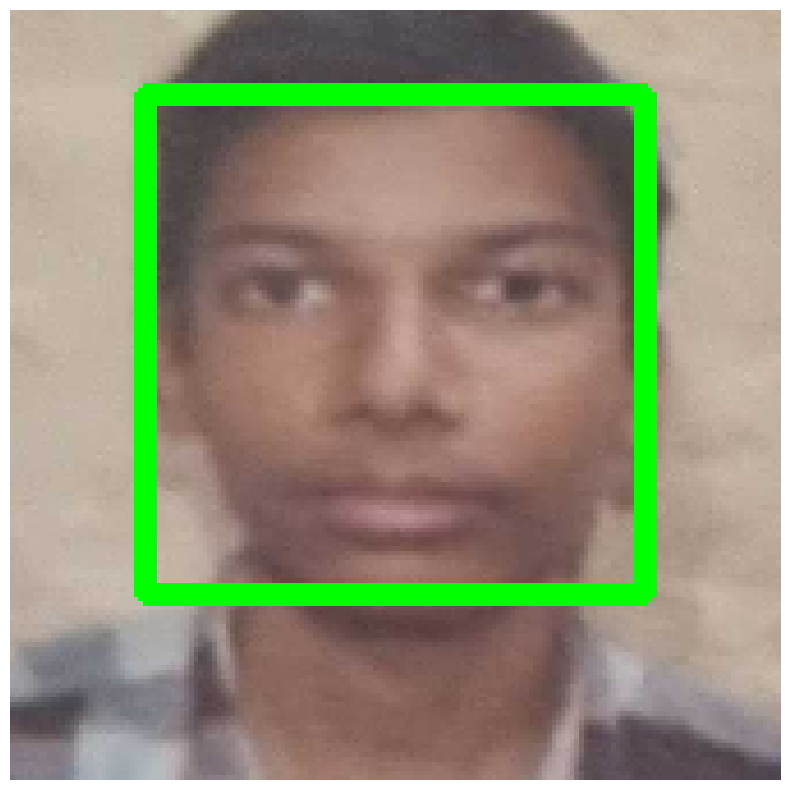

In [21]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [ ]:
#########################################
##### Real Time Face detection ##########
#########################################

In [22]:
import cv2

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [55]:
video_capture = cv2.VideoCapture(0)

In [25]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [56]:
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  # display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()

In [65]:
# OpenCV program to detect face in real time 
# import libraries of python OpenCV 
# where its functionality resides 
import cv2 

# load the required trained XML classifiers 
# https://github.com/Itseez/opencv/blob/master/ 
# data/haarcascades/haarcascade_frontalface_default.xml 
# Trained XML classifiers describes some features of some 
# object we want to detect a cascade function is trained 
# from a lot of positive(faces) and negative(non-faces) 
# images. 
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml') 

# https://github.com/Itseez/opencv/blob/master 
# /data/haarcascades/haarcascade_eye.xml 
# Trained XML file for detecting eyes 
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml') 

# capture frames from a camera 
cap = cv2.VideoCapture(0) 

# loop runs if capturing has been initialized. 
while 1: 

    # reads frames from a camera 
    ret, img = cap.read() 

    # convert to gray scale of each frames 
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#     # Detects faces of different sizes in the input image 
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
#     for (x,y,w,h) in faces: 
#         # To draw a rectangle in a face 
#         cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
#         roi_gray = gray[y:y+h, x:x+w] 
#         roi_color = img[y:y+h, x:x+w] 
#         # Detects eyes of different sizes in the input image 
#         eyes = eye_cascade.detectMultiScale(roi_gray) 
#         #To draw a rectangle in eyes 
#         for (ex,ey,ew,eh) in eyes: 
#             cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,127,255),2) 
    # Display an image in a window 
    cv2.imshow('img',img) 
    # Wait for Esc key to stop 
    k = cv2.waitKey(30) & 0xff
    if k == 27: 
        break

# Close the window 
cap.release() 

# De-allocate any associated memory usage 
cv2.destroyAllWindows() 


In [ ]:
#################################################
############## Yolo8 Face detection #############
#################################################

In [39]:
!git clone https://github.com/hpc203/yolov8-face-landmarks-opencv-dnn.git

Cloning into 'yolov8-face-landmarks-opencv-dnn'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 49 (delta 20), reused 2 (delta 0), pack-reused 0
Receiving objects: 100% (49/49), 21.54 MiB | 5.48 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [40]:
%cd yolov8-face-landmarks-opencv-dnn/

/Users/abhishekkumarsingh/Desktop/Test/data_gathrer/TTS/yolov8-face-landmarks-opencv-dnn


In [41]:
%ls

README.md     main.cpp      main_fqa.cpp  weights/
images/       main.py       main_fqa.py


In [90]:
!python main_rtm.py

nothing detect
nothing detect
nothing detect
nothing detect
nothing detect
nothing detect
nothing detect
nothing detect
nothing detect
nothing detect
nothing detect
nothing detect
nothing detect
nothing detect
nothing detect
nothing detect


In [ ]:
import cv2
import numpy as np
import math
import argparse

class YOLOv8_face:
    def __init__(self, path, conf_thres=0.2, iou_thres=0.5):
        self.conf_threshold = conf_thres
        self.iou_threshold = iou_thres
        self.class_names = ['face']
        self.num_classes = len(self.class_names)
        # Initialize model
        self.net = cv2.dnn.readNet(path)
        self.input_height = 640
        self.input_width = 640
        self.reg_max = 16

        self.project = np.arange(self.reg_max)
        self.strides = (8, 16, 32)
        self.feats_hw = [(math.ceil(self.input_height / self.strides[i]), math.ceil(self.input_width / self.strides[i])) for i in range(len(self.strides))]
        self.anchors = self.make_anchors(self.feats_hw)

    def make_anchors(self, feats_hw, grid_cell_offset=0.5):
        """Generate anchors from features."""
        anchor_points = {}
        for i, stride in enumerate(self.strides):
            h,w = feats_hw[i]
            x = np.arange(0, w) + grid_cell_offset  # shift x
            y = np.arange(0, h) + grid_cell_offset  # shift y
            sx, sy = np.meshgrid(x, y)
            # sy, sx = np.meshgrid(y, x)
            anchor_points[stride] = np.stack((sx, sy), axis=-1).reshape(-1, 2)
        return anchor_points

    def softmax(self, x, axis=1):
        x_exp = np.exp(x)
        # 如果是列向量，则axis=0
        x_sum = np.sum(x_exp, axis=axis, keepdims=True)
        s = x_exp / x_sum
        return s
    
    def resize_image(self, srcimg, keep_ratio=True):
        top, left, newh, neww = 0, 0, self.input_width, self.input_height
        if keep_ratio and srcimg.shape[0] != srcimg.shape[1]:
            hw_scale = srcimg.shape[0] / srcimg.shape[1]
            if hw_scale > 1:
                newh, neww = self.input_height, int(self.input_width / hw_scale)
                img = cv2.resize(srcimg, (neww, newh), interpolation=cv2.INTER_AREA)
                left = int((self.input_width - neww) * 0.5)
                img = cv2.copyMakeBorder(img, 0, 0, left, self.input_width - neww - left, cv2.BORDER_CONSTANT,
                                         value=(0, 0, 0))  # add border
            else:
                newh, neww = int(self.input_height * hw_scale), self.input_width
                img = cv2.resize(srcimg, (neww, newh), interpolation=cv2.INTER_AREA)
                top = int((self.input_height - newh) * 0.5)
                img = cv2.copyMakeBorder(img, top, self.input_height - newh - top, 0, 0, cv2.BORDER_CONSTANT,
                                         value=(0, 0, 0))
        else:
            img = cv2.resize(srcimg, (self.input_width, self.input_height), interpolation=cv2.INTER_AREA)
        return img, newh, neww, top, left

    def detect(self, srcimg):
        input_img, newh, neww, padh, padw = self.resize_image(cv2.cvtColor(srcimg, cv2.COLOR_BGR2RGB))
        scale_h, scale_w = srcimg.shape[0]/newh, srcimg.shape[1]/neww
        input_img = input_img.astype(np.float32) / 255.0

        blob = cv2.dnn.blobFromImage(input_img)
        self.net.setInput(blob)
        outputs = self.net.forward(self.net.getUnconnectedOutLayersNames())
        # if isinstance(outputs, tuple):
        #     outputs = list(outputs)
        # if float(cv2.__version__[:3])>=4.7:
        #     outputs = [outputs[2], outputs[0], outputs[1]] ###opencv4.7需要这一步，opencv4.5不需要
        # Perform inference on the image
        det_bboxes, det_conf, det_classid, landmarks = self.post_process(outputs, scale_h, scale_w, padh, padw)
        return det_bboxes, det_conf, det_classid, landmarks

    def post_process(self, preds, scale_h, scale_w, padh, padw):
        bboxes, scores, landmarks = [], [], []
        for i, pred in enumerate(preds):
            stride = int(self.input_height/pred.shape[2])
            pred = pred.transpose((0, 2, 3, 1))
            
            box = pred[..., :self.reg_max * 4]
            cls = 1 / (1 + np.exp(-pred[..., self.reg_max * 4:-15])).reshape((-1,1))
            kpts = pred[..., -15:].reshape((-1,15)) ### x1,y1,score1, ..., x5,y5,score5

            # tmp = box.reshape(self.feats_hw[i][0], self.feats_hw[i][1], 4, self.reg_max)
            tmp = box.reshape(-1, 4, self.reg_max)
            bbox_pred = self.softmax(tmp, axis=-1)
            bbox_pred = np.dot(bbox_pred, self.project).reshape((-1,4))

            bbox = self.distance2bbox(self.anchors[stride], bbox_pred, max_shape=(self.input_height, self.input_width)) * stride
            kpts[:, 0::3] = (kpts[:, 0::3] * 2.0 + (self.anchors[stride][:, 0].reshape((-1,1)) - 0.5)) * stride
            kpts[:, 1::3] = (kpts[:, 1::3] * 2.0 + (self.anchors[stride][:, 1].reshape((-1,1)) - 0.5)) * stride
            kpts[:, 2::3] = 1 / (1+np.exp(-kpts[:, 2::3]))

            bbox -= np.array([[padw, padh, padw, padh]])  ###合理使用广播法则
            bbox *= np.array([[scale_w, scale_h, scale_w, scale_h]])
            kpts -= np.tile(np.array([padw, padh, 0]), 5).reshape((1,15))
            kpts *= np.tile(np.array([scale_w, scale_h, 1]), 5).reshape((1,15))

            bboxes.append(bbox)
            scores.append(cls)
            landmarks.append(kpts)

        bboxes = np.concatenate(bboxes, axis=0)
        scores = np.concatenate(scores, axis=0)
        landmarks = np.concatenate(landmarks, axis=0)
    
        bboxes_wh = bboxes.copy()
        bboxes_wh[:, 2:4] = bboxes[:, 2:4] - bboxes[:, 0:2]  ####xywh
        classIds = np.argmax(scores, axis=1)
        confidences = np.max(scores, axis=1)  ####max_class_confidence
        
        mask = confidences>self.conf_threshold
        bboxes_wh = bboxes_wh[mask]  ###合理使用广播法则
        confidences = confidences[mask]
        classIds = classIds[mask]
        landmarks = landmarks[mask]
        
        indices = cv2.dnn.NMSBoxes(bboxes_wh.tolist(), confidences.tolist(), self.conf_threshold,
                                   self.iou_threshold).flatten()
        if len(indices) > 0:
            mlvl_bboxes = bboxes_wh[indices]
            confidences = confidences[indices]
            classIds = classIds[indices]
            landmarks = landmarks[indices]
            return mlvl_bboxes, confidences, classIds, landmarks
        else:
            print('nothing detect')
            return np.array([]), np.array([]), np.array([]), np.array([])

    def distance2bbox(self, points, distance, max_shape=None):
        x1 = points[:, 0] - distance[:, 0]
        y1 = points[:, 1] - distance[:, 1]
        x2 = points[:, 0] + distance[:, 2]
        y2 = points[:, 1] + distance[:, 3]
        if max_shape is not None:
            x1 = np.clip(x1, 0, max_shape[1])
            y1 = np.clip(y1, 0, max_shape[0])
            x2 = np.clip(x2, 0, max_shape[1])
            y2 = np.clip(y2, 0, max_shape[0])
        return np.stack([x1, y1, x2, y2], axis=-1)
    
    def draw_detections(self, image, boxes, scores, kpts):
        for box, score, kp in zip(boxes, scores, kpts):
            x, y, w, h = box.astype(int)
            # Draw rectangle
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=3)
            cv2.putText(image, "face:"+str(round(score,2)), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), thickness=2)
            for i in range(5):
                cv2.circle(image, (int(kp[i * 3]), int(kp[i * 3 + 1])), 4, (0, 255, 0), thickness=-1)
                # cv2.putText(image, str(i), (int(kp[i * 3]), int(kp[i * 3 + 1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), thickness=1)
        return image



# parser = argparse.ArgumentParser()
# parser.add_argument('--imgpath', type=str, default='images/2.jpg', help="image path")
# parser.add_argument('--modelpath', type=str, default='weights/yolov8n-face.onnx',
#                     help="onnx filepath")
# parser.add_argument('--confThreshold', default=0.45, type=float, help='class confidence')
# parser.add_argument('--nmsThreshold', default=0.5, type=float, help='nms iou thresh')
# args = parser.parse_args()

# Initialize YOLOv8_face object detector
YOLOv8_face_detector = YOLOv8_face('weights/yolov8n-face.onnx', conf_thres=0.45, iou_thres=0.5)

# capture frames from a camera 
# cap = cv2.VideoCapture(0) 

# # loop runs if capturing has been initialized. 
# while 1: 

#     # reads frames from a camera 
#     ret, img = cap.read() 

#     # convert to gray scale of each frames 
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#     # Detects faces of different sizes in the input image 
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
#     for (x,y,w,h) in faces: 
#         # To draw a rectangle in a face 
#         cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
#         roi_gray = gray[y:y+h, x:x+w] 
#         roi_color = img[y:y+h, x:x+w] 
#         # Detects eyes of different sizes in the input image 
#         eyes = eye_cascade.detectMultiScale(roi_gray) 
#         #To draw a rectangle in eyes 
#         for (ex,ey,ew,eh) in eyes: 
#             cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,127,255),2) 
#     # Display an image in a window 
#     cv2.imshow('img',img) 
#     # Wait for Esc key to stop 
#     k = cv2.waitKey(30) & 0xff
#     if k == 27: 
#         break

# # Close the window 
# cap.release() 

# # De-allocate any associated memory usage 
# cv2.destroyAllWindows() 

srcimg = cv2.imread('images/test.jpg')

# Detect Objects
boxes, scores, classids, kpts = YOLOv8_face_detector.detect(srcimg)
print(boxes.shape, scores.shape, classids, kpts.shape)

# Draw detections
dstimg = YOLOv8_face_detector.draw_detections(srcimg, boxes, scores, kpts)
#cv2.imwrite('result.jpg', dstimg)
winName = 'Deep learning face detection use OpenCV'
cv2.namedWindow(winName, 0)
cv2.imshow(winName, dstimg)
cv2.waitKey(0)
cv2.destroyAllWindows()
